<a href="https://colab.research.google.com/github/swapnaveel/DAV1Nikhil/blob/main/Numpy_1_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy 1

---

## **Content**

- Introduction to DAV
- Python Lists vs Numpy Array
  - Importing Numpy
  - Why use Numpy?
- Dimension & Shape
- Type Conversion in Numpy Arrays
- Indexing & Slicing
- NPS use case


---

## **Introduction to DAV (Data Analysis and Visualization) Module**

With this lecture, we're starting the DAV module.

It will contain 3 sections -

1. DAV-1: Python Libraries
 - Numpy
 - Pandas
 - Matplotlib & Seaborn
2. DAV-2: Probability Statistics
3. DAV-3: Hypothesis Testing

---

## **Python Lists vs Numpy Arrays**

### **Homogeneity of data**

So far, we've been working with Python lists, that can have **heterogenous data**.

In [ ]:
a = [1, 2, 3, "Michael", True]
a

[1, 2, 3, 'Michael', True]

Because of this hetergenity, in Python lists, the data elements are not stored together in the memory (RAM).

- Each element is stored in a different location.
- Only the address of each of the element will be stored together.
- So, a list is actually just referencing to these different locations, in order to access the actual element.

\
On the other hand, Numpy only stores **homogenous data**, i.e. a numpy array cannot contain mixed data types.

It will either
- ONLY contain integers
- ONLY contain floats
- ONLY contain characters

... and so on.

Because of this, we can now store these different data items together, as they are of the same type.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/995/original/download.png?1706870327" width=700 height=175>

### **Speed**

Programming languages can also be slow or fast.

In fact,
- Java is a decently fast language.
- Python is a slow language.
- C, one of the earliest available languages, is super fast.

This is because C has concepts like memory allocation, pointers, etc.

#### **How is this possible?**

With Numpy, though we will be writing our code using Python, but behind the scene, all the code is written in the **C programming language**, to make it faster.

Because of this, a Numpy Array will be significantly faster than a Python List in performing the same operation.

This is very important to us, because in data science, we deal with huge amount of data.


### **Properties**

- **In-built Functions**
 - For a Python list `a`, we had in-built functions like `.sum(a)`, etc.
 - For NumPy arrays also, we will have such in-built functions.

- **Slicing**
 - Recall that we were able to perform list slicing.
 - All of that is still applicable here.


---

## **Importing Numpy**

Recall how we used to import a module/library in Python.

* In order to use Python Lists, we do not need to import anything extra.
* However to use Numpy Arrays, we need to import it into our environment, as it is a Library.

Generally, we do so while using the alias **`np`**.

In [ ]:
import numpy as np

**Note:**
- In this terminal, we will already have numpy installed as we are working on Google Colab
- However, when working on an evironment that does not have it installed, you'll have to install it the first time working.
- This can be done with the command: `!pip install numpy`

---

## **Why use Numpy? - Time Comparison**

Suppose you are given a list of numbers. You have to find the square of each number and store it in the original list.


In [ ]:
a = [1,2,3,4,5]

In [ ]:
type(a)

list

The basic approach here would be to iterate over the list and square each element.

In [ ]:
res = [i**2 for i in a]
print(res)

[1, 4, 9, 16, 25]


Let's try the same operation with Numpy.

To do so, first of all we need to define the Numpy array.

We can convert any list `a` into a Numpy array using the `array()` function.

In [ ]:
b = np.array(a)
b

array([1, 2, 3, 4, 5])

In [ ]:
type(b)

numpy.ndarray

- `nd` in `numpy.ndarray` stands for **n-dimensional**

Now, how can we get the square of each element in the same Numpy array?

In [ ]:
b**2

array([ 1,  4,  9, 16, 25])

**The biggest benefit of Numpy is that it supports element-wise operation.**

Notice how easy and clean is the syntax.

But is the clean syntax and ease in writing the only benefit we are getting here?

- To understand this, let's measure the time for these operations.
- We will use `%timeit`.

In [ ]:
l = range(1000000)

In [ ]:
%timeit [i**2 for i in l]

343 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**It took approx 300 ms  per loop to iterate and square all elements from 0 to 999,999**



Let's peform the same operation using Numpy arrays -

- We will use `np.array()` method for this.
- We can peform element wise operation using numpy.

In [ ]:
l = np.array(range(1000000))

In [ ]:
%timeit l**2

778 µs ± 100 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Notice that it only took 900 $\mu$s per loop time for the numpy operation.

**What is the major reason behind numpy's faster computation?**

- Numpy array is densely packed in memory due to it's **homogenous** type.
- Numpy functions are implemented in **C programming launguage**.
- Numpy is able to divide a task into multiple subtasks and process them **parallelly.**

---

## **Dimensions and Shape**

**We can get the dimension of an array using the `ndim` property.**

In [ ]:
arr1 = np.array(range(1000000))
arr1.ndim

1

**Numpy arrays have another property called `shape` that tells us number of elements across every dimension.**

In [ ]:
arr1.shape

(1000000,)

This means that the array `arr1` has 1000000 elements in a single dimension.

Let's take another example to understand `shape` and `ndim` better.

In [ ]:
arr2 = np.array([[1, 2, 3], [4, 5, 6], [10, 11, 12]])
print(arr2)

[[ 1  2  3]
 [ 4  5  6]
 [10 11 12]]


**What do you think will be the shape & dimension of this array?**

In [ ]:
arr2.ndim

2

In [ ]:
arr2.shape

(3, 3)

`ndim` specifies the number of dimensions of the array i.e. 1D (1), 2D (2), 3D (3) and so on.

`shape` returns the exact shape in all dimensions, that is (3,3) which implies 3 in axis 0 and 3 in axis 1.

<img src="https://drive.google.com/uc?id=1GSV_E1CaCc_Ur7pWJ-Kqv0VKvBRwByR1">

---

### **`np.arange()`**

Let's create some sequences in  Numpy.

We can pass **starting** point, **ending** point (not included in the array) and **step-size**.

**Syntax:**
- `arange(start, end, step)`

In [ ]:
arr2 = np.arange(1, 5)
arr2

array([1, 2, 3, 4])

In [ ]:
arr2_step = np.arange(1, 5, 2)
arr2_step

array([1, 3])

`np.arange()` behaves in the same way as `range()` function.

**But then why not call it np.range?**

- In `np.arange()`, we can pass a **floating point number** as **step-size**.

In [ ]:
arr3 = np.arange(1, 5, 0.5)
arr3

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

---

## **Type Conversion in Numpy Arrays**

For this, let's pass a **float** as one of the values in a **numpy array**.

In [ ]:
arr4 = np.array([1, 2, 3, 4])
arr4

array([1, 2, 3, 4])

In [ ]:
arr4 = np.array([1, 2, 3, 4.0])
arr4

array([1., 2., 3., 4.])

- Notice that **`int` is raised to `float`**
- Because a numpy array can only store **homogenous data** i.e. values of one data type.

Similarly, what will happen when we run the following code? Will it give an error?

In [ ]:
np.array(["Harry Potter", 1, 2, 3])

array(['Harry Potter', '1', '2', '3'], dtype='<U21')

No. It will convert all elements of the array to `char` type.

There's a `dtype` parameter in the `np.array()` function.

**What if we set the `dtype` of array containing `integer` values to `float`?**

In [ ]:
arr5 = np.array([1, 2, 3, 4])
arr5

array([1, 2, 3, 4])

In [ ]:
arr5 = np.array([1, 2, 3, 4], dtype="float")
arr5

array([1., 2., 3., 4.])

**Question:** What will happen in the following code?

In [ ]:
np.array(["Shivank", "Bipin", "Ritwik"], dtype=float)

ValueError: could not convert string to float: 'Shivank'

Since it is not possible to convert strings of alphabets to floats, it will naturally return an Error.

\
We can also convert the data type with the `astype()` method.

In [ ]:
arr = np.array([10, 20, 30, 40, 50])
arr

array([10, 20, 30, 40, 50])

In [ ]:
arr = arr.astype('float64')
print(arr)

[10. 20. 30. 40. 50.]


---

## **Indexing**

- Similar to Python lists

In [ ]:
m1 = np.arange(12)
m1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
m1[0] # gives first element of array

0

In [ ]:
m1[-1] # negative indexing in numpy array

11

You can also use list of indexes in numpy.

In [ ]:
m1 = np.array([100,200,300,400,500,600])

In [ ]:
m1[[2,3,4,1,2,2]]

array([300, 400, 500, 200, 300, 300])

Did you notice how single index can be repeated multiple times when giving list of indexes?

**Note:**
- If you want to extract multiple indices, you need to use two sets of square brackets `[[ ]]`
  - Otherwise, you will get an error.
- Because it is only expecting a single index.
- For multiple indices, you need to pass them as a list.



In [ ]:
m1[2,3,4,1,2,2]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

---

## **Slicing**

- Similar to Python lists

In [ ]:
m1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
m1[:5]

array([1, 2, 3, 4, 5])

**Question:** What'll be output of `arr[-5:-1]` ?

In [ ]:
m1[-5:-1]

array([6, 7, 8, 9])

**Question:** What'll be the output for `arr[-5:-1: -1]` ?




In [ ]:
m1[-5: -1: -1]

array([], dtype=int64)

---

## **Fancy Indexing (Masking)**

- Numpy arrays can be indexed with boolean arrays (masks).
- This method is called **fancy indexing** or **masking**.

\
What would happen if we do this?


In [ ]:
m1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
m1 < 6

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

**Comparison operation also happens on each element**.
- All the values before 6 return `True`
- All the values after 6 return `False`



**Question:** What will be the output of the following?

In [ ]:
m1[[True,  True,  True,  True,  True, False, False, False, False, False]]

array([1, 2, 3, 4, 5])

Notice that we are passing a list of indices.
- For every instance of `True`, it will print the corresponding index.
- Conversely, for every `False`, it will skip the corresponding index, and not print it.

So, this becomes a **filter** of sorts.

Now, let's use this to filter or mask values from our array.

**Condition will be passed instead of indices and slice ranges.**

In [ ]:
m1[m1 < 6]

array([1, 2, 3, 4, 5])

This is known as **Fancy Indexing** in Numpy.

\
**Question:** How can we filter/mask even values from our array?

In [ ]:
m1[m1%2 == 0]

array([ 2,  4,  6,  8, 10])

---

## **Use Case: NPS (Net Promoter Score)**


#### Imagine you are a Data Analyst @ Airbnb

You've been asked to analyze user survey data and report NPS to the management.

#### But, what exactly is NPS?

Have you all seen that every month, you get a survey form from Scaler?

- This form asks you to fill in feedback regarding how you are liking the services of Scaler in terms of a numerical score.
- This is known as the **Likelihood to Recommend Survey**.
- It is widely used by different companies and service providers to evaluate their performance and customer satisfaction.

<img src="https://drive.google.com/uc?id=1-u8e-v_90JdikorKsKzBM-JJqoRtzsN8">

- Responses are given a scale ranging from 0–10,
    - with 0 labeled with “Not at all likely,” and
    - 10 labeled with “Extremely likely.”

Based on this, we calculate the **Net Promoter Score**.

### **How to calculate NPS score?**

<img src="https://drive.google.com/uc?id=1KPIYlaN68vlL99iApaF5QbeBoyT24-Eu">

We label our responses into 3 categories:
- **Detractors**: Respondents with a score of 0-6
- **Passive**: Respondents with a score of 7-8
- **Promoters**: Respondents with a score of 9-10.

```
Net Promoter score = % Promoters - % Detractors.
```


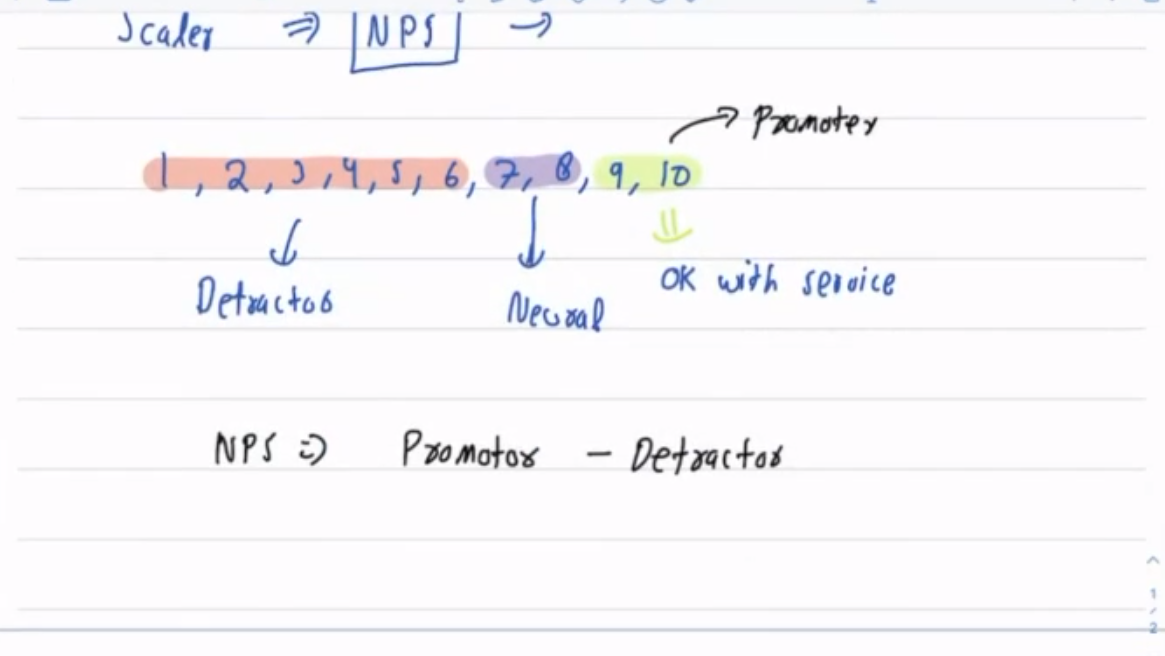

### **Range of NPS**

- If all people are promoters (rated 9-10), we get $100$ NPS
- Conversely, if all people are detractors (rated 0-6), we get $-100$ NPS
- Also, if all people are neutral (rated 7-8), we get a $0$ NPS

Therefore, the range of NPS lies between $[-100, 100]$

\
Generally, each company targets to get at least a threshold NPS.
- For Scaler, this is a score of 70.
- This means that if $NPS > 70%$, it is great performance of the company.

Naturally, this varies from business to business.

### **How is NPS helpful?**

####  Why would we want to analyse the survey data for NPS?

NPS helps a brand in gauging its brand value and sentiment in the market.

- Promoters are highly likely to recommend your product or sevice. Hence, bringing in more business.
- whereas, Detractors are likely to recommend against your product or service’s usage. Hence, bringing the business down.

\
These insights can help business make customer oriented decision along with product improvisation.

**2/3 of Fortune 500 companies use NPS**

\
Even at Scaler, every month, we randomnly reach out to our learners over a call, and try to understand,
- How is the overall experience for them?
- What are some things that they like?
- What do they don't like?

Based on the feedback received, sometimes we end up getting really good insights, and tackle them.

This will help improve the next month's NPS.

### **NPS Problem**

Let's first look at the data we have gathered.

**Dataset:** https://drive.google.com/file/d/1c0ClC8SrPwJq5rrkyMKyPn80nyHcFikK/view?usp=sharing

<img width = 500 src="https://drive.google.com/uc?id=1arJhLlzbr_Rf7ONxpkzo726mLbTyLb_p">




Downloading the dataset -

In [ ]:
!pip install --upgrade gdown
!gdown 1c0ClC8SrPwJq5rrkyMKyPn80nyHcFikK

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1c0ClC8SrPwJq5rrkyMKyPn80nyHcFikK
To: /content/survey.txt
100% 2.55k/2.55k [00:00<00:00, 9.56MB/s]


Loading the data -

- For this we will use the `.loadtxt() function`
- We provide file name along with the dtype of data that we want to load.
- Documentation: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [ ]:
score = np.loadtxt('survey.txt', dtype ='int')

Let's check the type of this data variable `score` -



In [ ]:
type(score)

numpy.ndarray

Let's see what the data looks like -

In [ ]:
score[:5]

array([ 7, 10,  5,  9,  9])

Let's check the number of responses -

In [ ]:
score.shape

(1167,)

There are a total of 1167 responses for the LTR survey.

\
Now, let's calculate NPS using these response.

**NPS = % Promoters - % Detractors**

In order to calculate NPS, we need to calculate two things:
- % Promoters
- % Detractors

In order to calculate `% Promoters` and `% Detractors`, we need to get the count of promoter as well as detractor.

\
**Question:** How can we get the count of Promoter/Detractor ?

- We can do so by using fancy indexing (masking).

Let's get the count of promoter and detractors -

Detractors have a `score <= 6`

In [ ]:
detractors = score[score <= 6]

In [ ]:
# Number of detractors -

num_detractors = len(detractors)
num_detractors

332

Promoters have a `score >= 9`

In [ ]:
promoters = score[score >= 9]

In [ ]:
# Number of promoters -

num_promoters = len(promoters)
num_promoters

609

In [ ]:
total = len(score)
total

1167

In [ ]:
# % of detractors -

percentage_detractors = (num_detractors/total) * 100
percentage_detractors

28.449014567266495

In [ ]:
# % of promoters -

percentage_promoters = (num_promoters/total) * 100
percentage_promoters

52.185089974293064

In [ ]:
nps = percentage_promoters - percentage_detractors
nps

23.73607540702657

In [ ]:
# Rounding off upto 2 decimal places -

np.round(nps, 2)

23.74

---